In [26]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 2px  black solid !important;
    padding: 2px  black solid !important;
  color: black !important;
}
</style>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

In [4]:
df = pd.read_csv("Downloads/data/infraction statistics/homepage_actions.csv")

In [5]:
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [7]:
df.nunique()

timestamp    8188
id           6328
group           2
action          2
dtype: int64

In [8]:
df['group'].value_counts()

control       4264
experiment    3924
Name: group, dtype: int64

In [9]:
df['action'].value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [10]:
control_df = df.query('group=="control"')

In [11]:
p_control = control_df.query('action=="click"').id.nunique()/control_df.query('action=="view"').id.nunique()

In [12]:
p_control

0.2797118847539016

In [13]:
experiment_df = df.query('group=="experiment"')

In [14]:
p_experiment = experiment_df.query('action=="click"').id.nunique()/experiment_df.query('action=="view"').id.nunique()

In [15]:
p_experiment

0.3097463284379172

In [16]:
#Observed Difference in CTR
obs_diff = p_experiment - p_control
obs_diff

0.030034443684015644

In [17]:
# bootstrapping 
diffs = []
for _ in range(1000):
    boot_sample = df.sample(df.shape[0], replace=True)
    control_df = boot_sample.query('group=="control"')
    experiment_df = boot_sample.query('group=="experiment"')
    p_control = control_df.query('action=="click"').id.nunique()/control_df.query('action=="view"').id.nunique()
    p_experiment = experiment_df.query('action=="click"').id.nunique()/experiment_df.query('action=="view"').id.nunique()
    diffs.append(p_experiment - p_control)

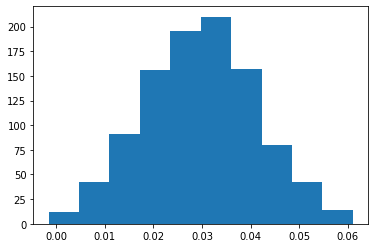

In [18]:
plt.hist(diffs);

In [19]:
# simulation to null hypothesis
diffs = np.array(diffs)
null_vais = np.random.normal(0, diffs.std(), diffs.size)

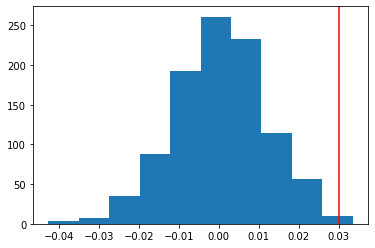

In [25]:
# Plot observed statistic with the null distibution
plt.hist(null_vais);
plt.axvline(obs_diff, color='r');

In [21]:
# P_value 
(null_vais > obs_diff).mean()
# conclusion 
# p_value < type one error (0.05) == reject null hypotheses [H0]

0.003

In [27]:
# Bonferroni correction == alpha/count tests
0.05/4

0.0125